## To predict whether a person will have diabetes or not.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
## Load the data
data=pd.read_csv('diabetes1.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic Checks 

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Domain Analysis.

### Exploratory Data Analysis

In [8]:
#Step 1 Univariate Analysis
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


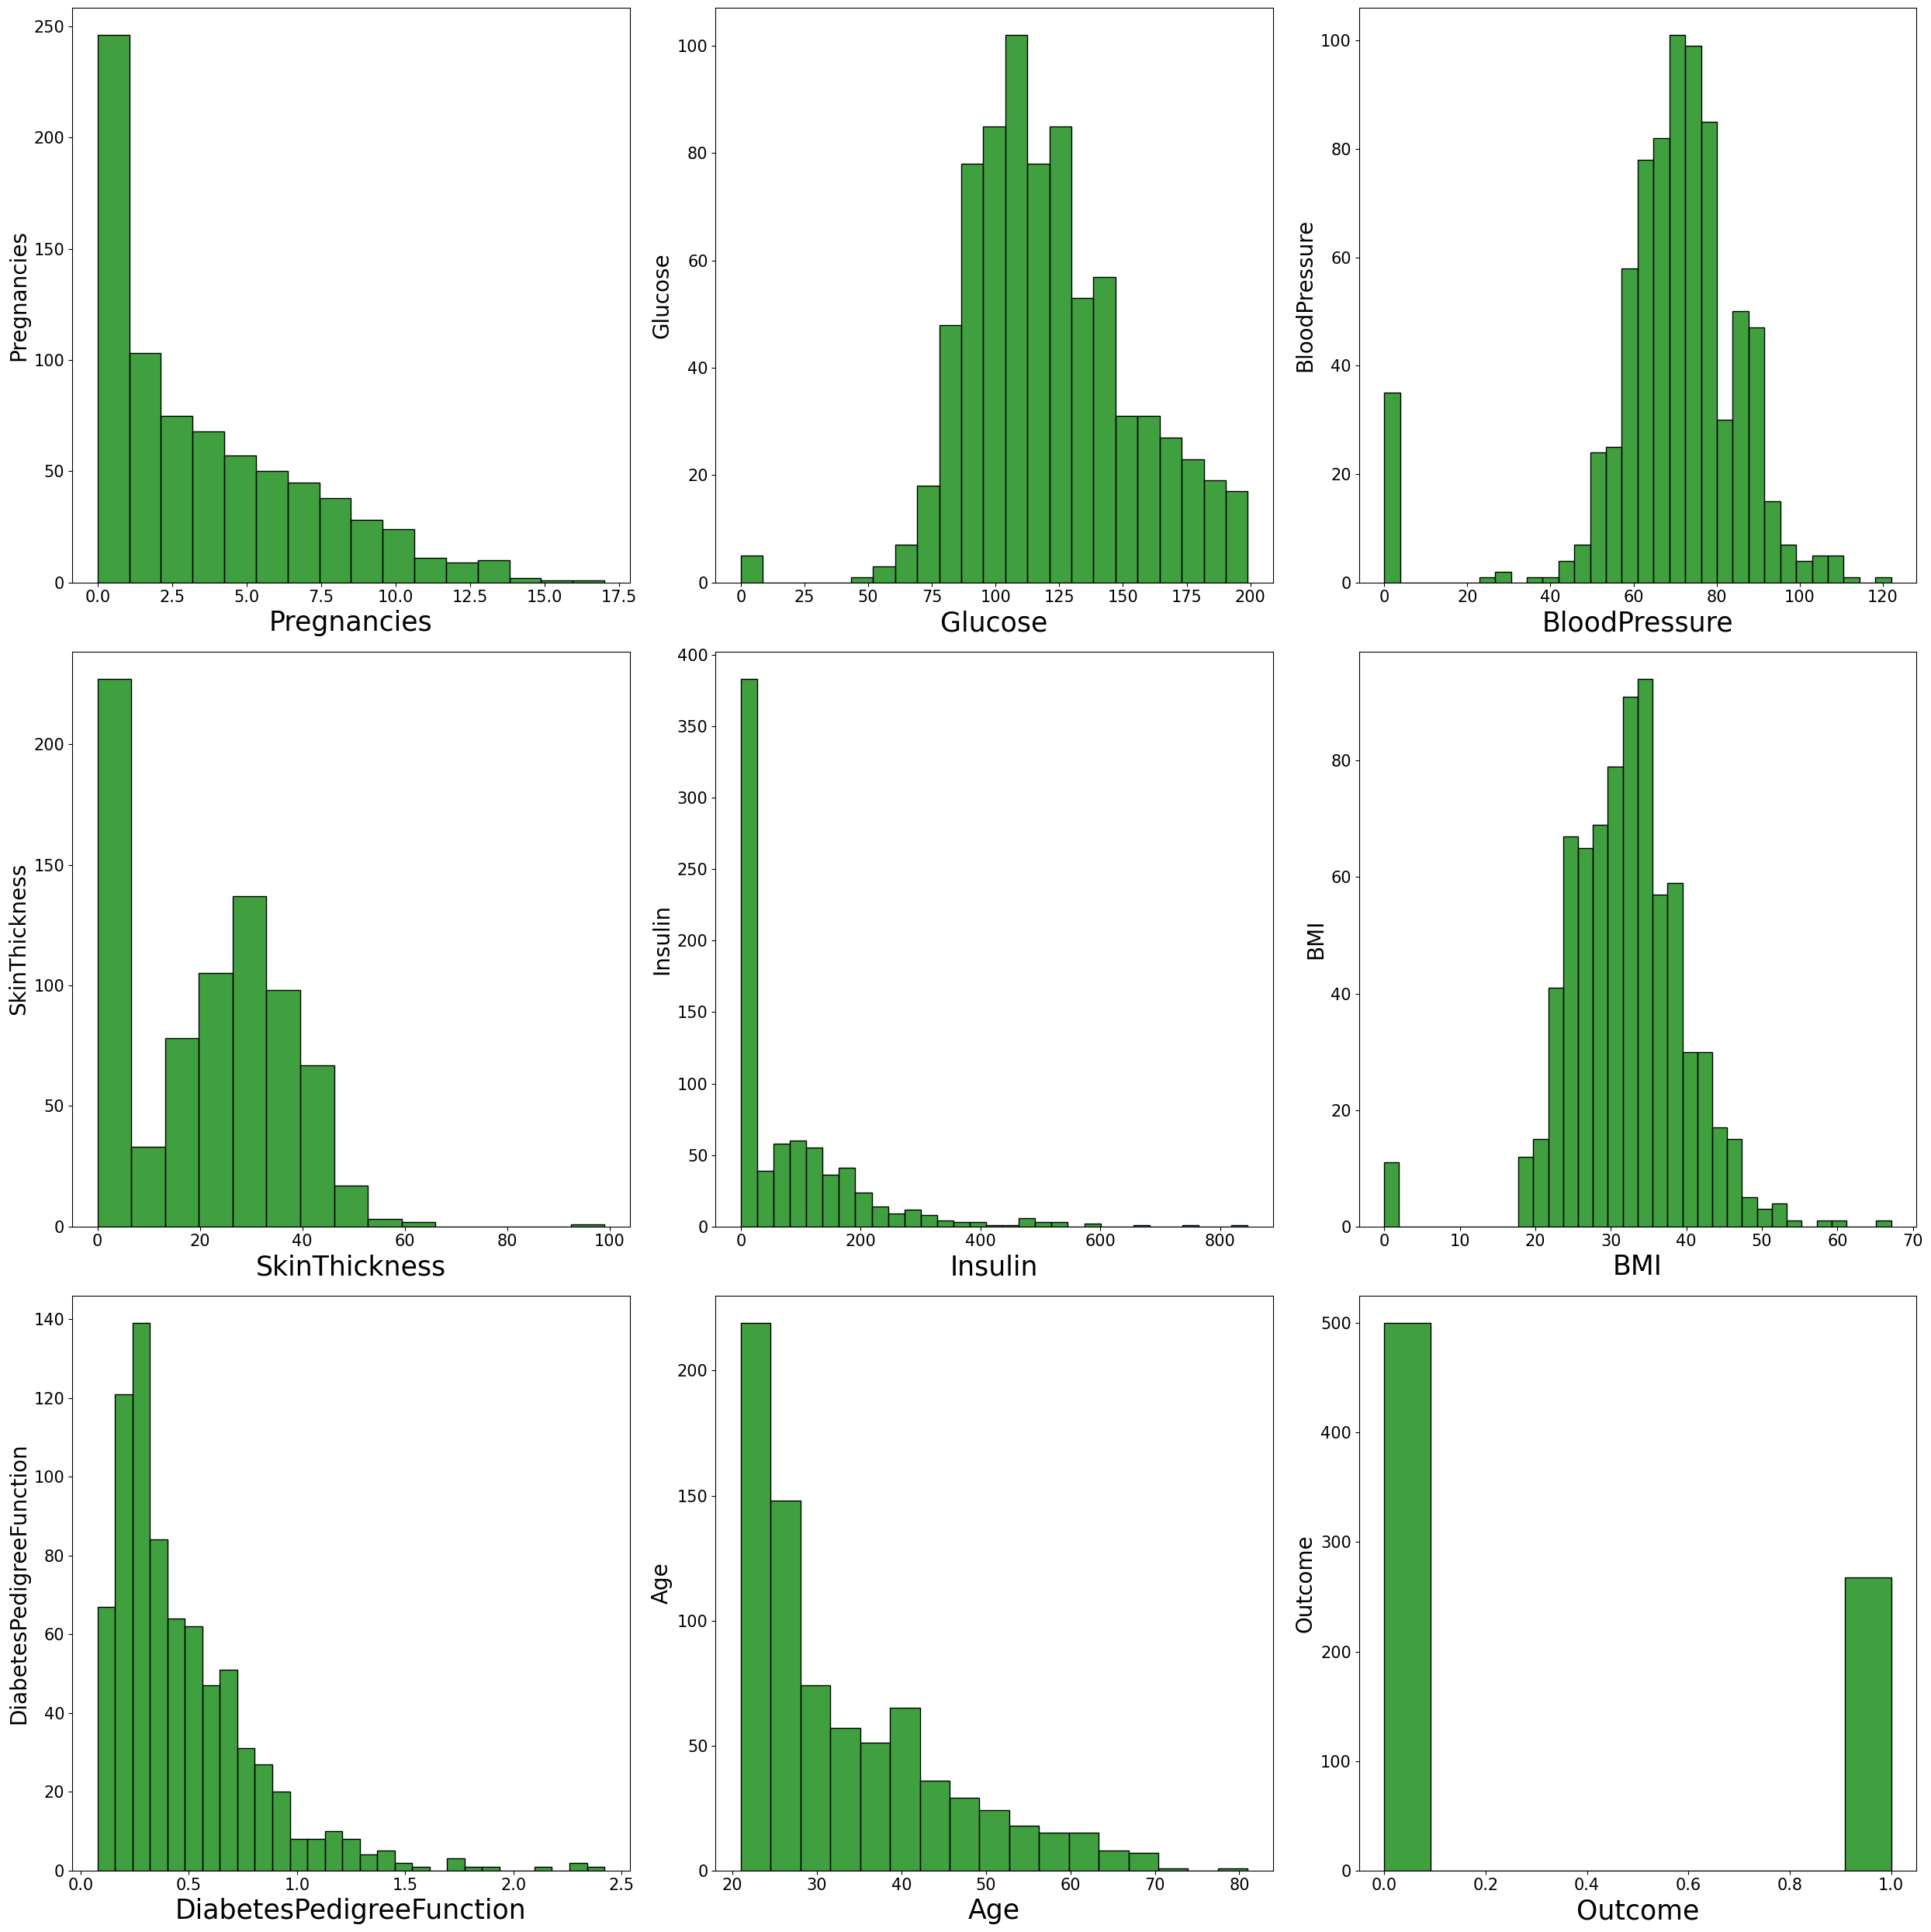

In [9]:
plt.figure(figsize=(25,25),facecolor='white')
plot_num = 1

for column in data:
    if plot_num <= 9:
        plt.subplot(3,3,plot_num)
        sns.histplot(data[column],color="green")
        plt.xlabel(column,fontsize=25)
        plt.ylabel(column,fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plot_num = plot_num+1
plt.tight_layout()

In [10]:
# 1.) Maximum patients have conceived  1 and 0 times.

In [11]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [10]:
print(data['Pregnancies'].unique())
print(data['Outcome'].unique())


[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[1 0]


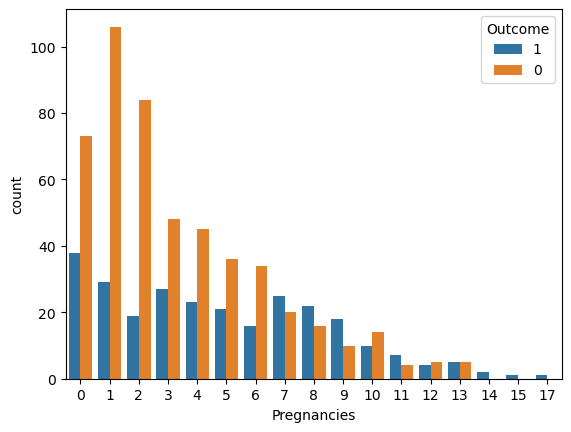

In [11]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
sns.countplot(x=data.Pregnancies,hue=data.Outcome.astype('str'))
plt.show()

In [ ]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x='Glucose',hue='Outcome',data=data)


In [ ]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

In [ ]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)
plt.show()

In [ ]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

## Data Preprocessing and Feature Engineering.

In [ ]:
#Step 1 Handling the missing values
data.isnull().sum()

In [ ]:
data.loc[data['Glucose']==0,"Glucose"] = np.median(data.Glucose)

In [ ]:
data.loc[data['Glucose']==0,"Glucose"]

In [ ]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)

#dataframe.colum.replace('Value to be replaced','By what value')


In [ ]:
data.loc[data['BloodPressure']==0,"BloodPressure"] = np.median(data.BloodPressure)

In [ ]:
data.loc[data['Insulin']==0,"Insulin"]

In [ ]:
data.loc[data['BMI']==0]

In [13]:
#data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [14]:
## Step 3:-Numerical representation of string data

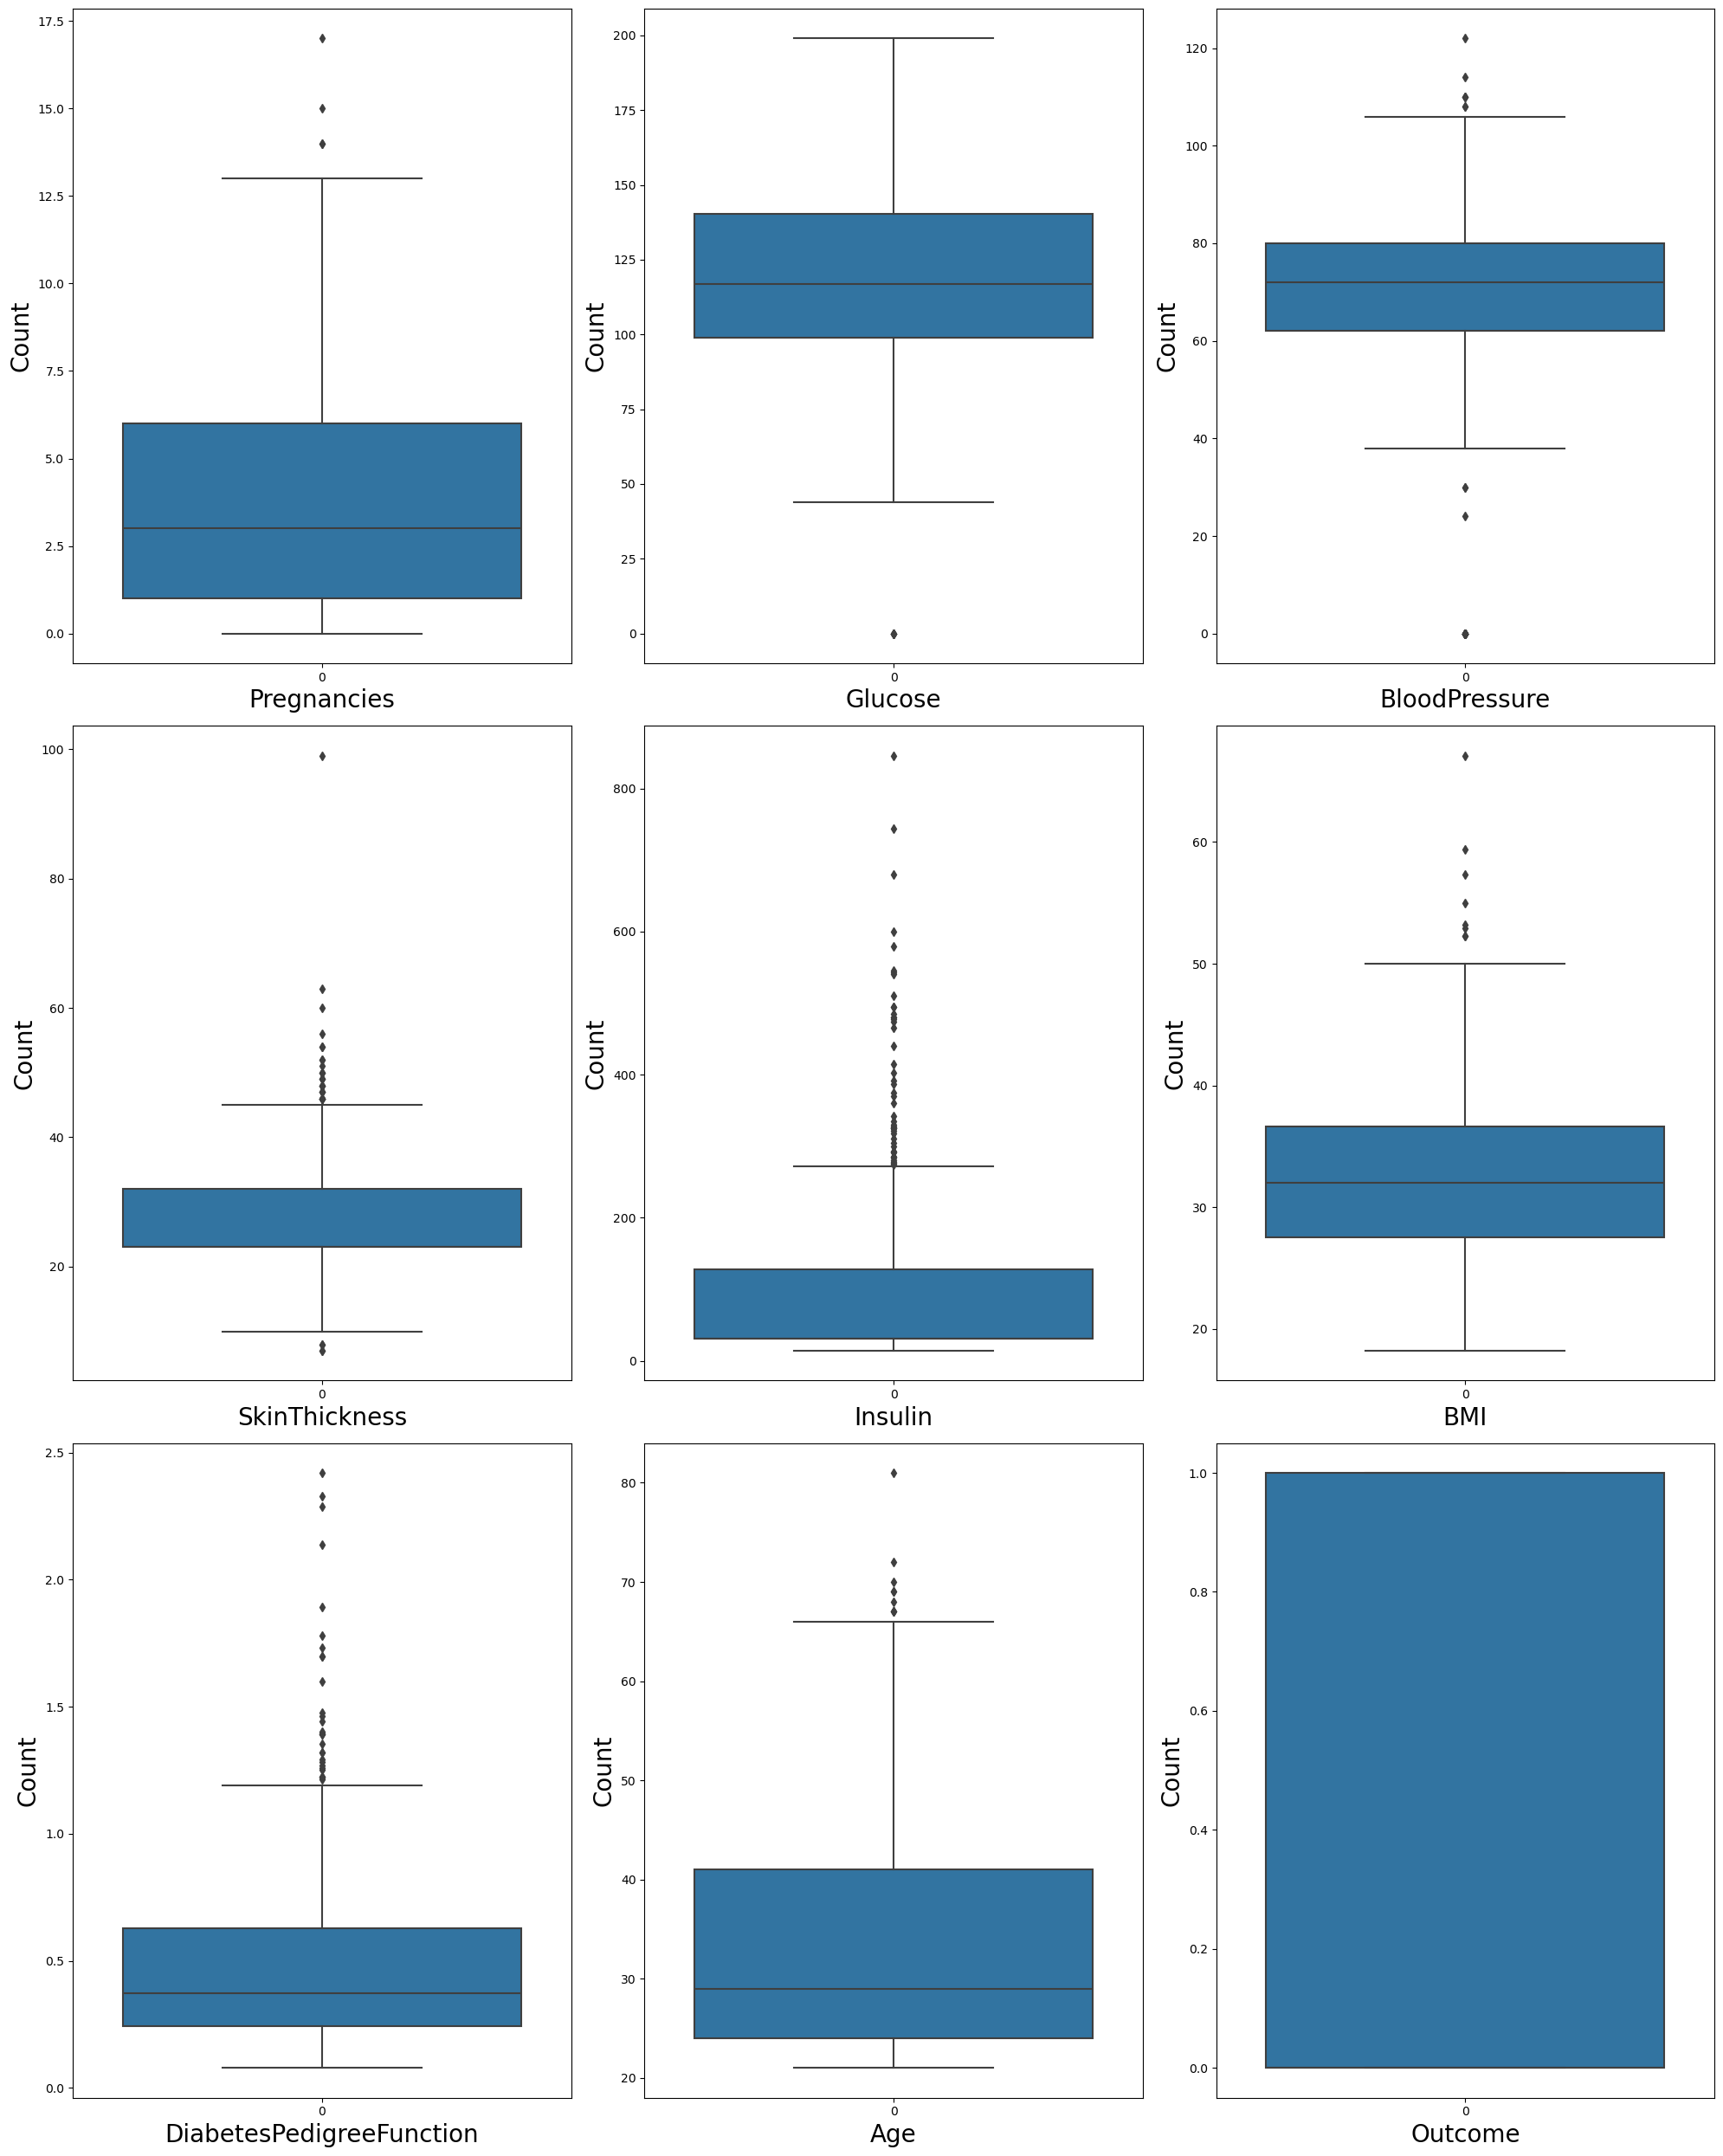

In [15]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
Q1 = data.Pregnancies.quantile(0.25)
Q1

1.0

In [17]:
Q3 = data.Pregnancies.quantile(0.75)
Q3

6.0

In [18]:
IQR = Q3-Q1
IQR

5.0

In [19]:
lower_boundry = Q1-1.5*IQR
print(lower_boundry)
upper_boundry = Q3+1.5*IQR
upper_boundry

-6.5


13.5

In [20]:
data.loc[data["Pregnancies"]>upper_boundry,"Pregnancies"] = np.median(data.Pregnancies)

In [21]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [ ]:
data

In [22]:
## Step 5:-Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))


In [24]:
data1[0]

array([0.74371859, 0.59016393, 0.30434783, 0.01983173, 0.31492843,
       0.23441503, 0.48333333])

In [ ]:
con_data=data[['Pregnancies','Outcome']]
con_data

In [ ]:
data.columns

In [26]:
type(data1)
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
data2

In [28]:
final_df=pd.concat([data2,con_data],axis=1)

In [ ]:
final_df

## Feature  Selection

In [ ]:
final_df.corr()

In [ ]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be 

In [ ]:
final_df

## Model Creation

In [33]:
## Step 1 Creating independent and dependent variable.

X=final_df.iloc[:,:-1]
y=final_df.Outcome

In [34]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.743719,0.590164,0.304348,0.019832,0.314928,0.234415,0.483333,6
1,0.427136,0.540984,0.239130,0.019832,0.171779,0.116567,0.166667,1
2,0.919598,0.524590,0.173913,0.019832,0.104294,0.253629,0.183333,8
3,0.447236,0.540984,0.173913,0.096154,0.202454,0.038002,0.000000,1
4,0.688442,0.327869,0.304348,0.185096,0.509202,0.943638,0.200000,0
...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.445652,0.199519,0.300613,0.039710,0.700000,10
764,0.613065,0.573770,0.217391,0.019832,0.380368,0.111870,0.100000,2
765,0.608040,0.590164,0.173913,0.117788,0.163599,0.071307,0.150000,5
766,0.633166,0.491803,0.173913,0.019832,0.243354,0.115713,0.433333,1


In [35]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.20)

In [ ]:
y_test

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [42]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [43]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [44]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [47]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Evaluation of Model

## Evaluation of a Classification Model

In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is?
For a  regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics
In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values.
In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted.
The different metrics used for this purpose are:
- Accuracy
- Recall
- Precision
- F1 Score
- Specifity
- AUC( Area Under the Curve)
- ROC(Receiver Operator Characteristic)
- Classification Report

### Confusion Matrix

A typical confusion matrix looks like the figure shown.

<img src="confusionMatrix.PNG" width="300">

Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

### Accuracy
The mathematical formula is :

   __Accuracy__= $ \frac{ (TP+TN)}{(TP+TN+FP+FN)} $
    
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications.
Its is not the correct for inbalanc data beacause its always show you high accurancy becoz its bais to the high count data in binary classification
becoz its not calculate the error / its won't count the error 

#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

Consider a classification model , the model gave 50 correct predictions(TP) but failed to identify 200 cancer patients(FN). Recall in that case will be:

Recall=$ \frac {50}{(50+200)} $= 0.2 (The model was able to recall only 20% of the cancer patients)


### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $

Let’s suppose in the previous example, the model identified 50 people as cancer patients(TP) but also raised a  false alarm for 100 patients(FP). Hence,

Precision=$ \frac {50}{(50+100)} $=0.33 (The model only has a precision of 33%)


### But we have a problem!!

As evident from the previous example, the model had a very high Accuracy but performed poorly in terms of Precision and Recall. So, necessarily _Accuracy_ is not the metric to use for evaluating the model in this case.

Imagine a scenario, where the requirement was that the model recalled all the defaulters who did not pay back the loan. Suppose there were 10 such defaulters and to recall those 10 defaulters, and the model gave you 20 results out of which only the 10 are the actual defaulters. Now, the recall of the model is 100%, but the precision goes down to 50%.








### A Trade-off?

<img src="tradeoff.PNG" width="300">

As observed from the graph, with an increase in the Recall, there is a drop in Precision of the model.

So the question is - what to go for? Precision or Recall?

Well, the answer is: it depends on the business requirement.

For example, if you are predicting cancer, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision.

Can we maximise both at the same time? No

So, there is a need for a better metric then?

Yes. And it’s called an _F1 Score_


### F1 Score

From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall. 

The mathematical formula is:
        F1 score= $ \frac {2*((Precision*Recall)}{(Precision+Recall))} $


### Specificity or True Negative Rate

This represents how specific is the model while predicting the True Negatives.
Mathematically,

   Specificity=$ \frac {TN}{(TN+FP)} $
Or, it can be said that it quantifies the total number of negatives predicted by the model with respect to the total number of actual negative or non favorable outcomes.

Similarly, False Positive rate can be defined as:  (1- specificity)
Or,  $ \frac {FP}{(TN+FP)} $


### ROC(Receiver Operator Characteristic)

We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome. 

Now, the question is, what should be an ideal threshold?


The following diagram shows a typical logistic regression curve.
<img src="logisticRegression.PNG" width="300">

* The horizontal lines represent the various values of thresholds ranging from 0 to 1.
* Let’s suppose our classification problem was to identify the obese people from the given data.
* The green markers represent obese people and the red markers represent the non-obese people.
* Our confusion matrix will depend on the value of the threshold chosen by us.
* For Example, if 0.25 is the threshold then
        TP(actually obese)=3
        TN(Not obese)=2
        FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line)
        FN(Obese but predicted as not obese )=1(Green circle below 0.25line  )


A typical ROC curve looks like the following figure.
<img src="ROC.PNG" width="300">

* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The green dotted line represents the scenario when the true positive rate equals the false positive rate.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* The ROC curve answers our question of which threshold to choose.


### But we have a confusion!!

Let’s suppose that we used different classification algorithms, and different ROCs for the corresponding algorithms have been plotted.
The question is: which algorithm to choose now?
The answer is to calculate the area under each ROC curve.

#### AUC(Area Under Curve)

<img src="AUC.PNG" width="300">

* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one


#### When to use recall and when to you precision

* We have thousands of free customers registering in our website every week. The call center team wants to call them all, but it is imposible, so they ask me to select those with good chances to be a buyer (with high temperature is how we refer to them). We don't care to call a guy that is not going to buy (so precision is not important) but for us is very important that all of them with high temperature are always in my selection, so they don't go without buying. That means that my model needs to have a high recall, no matter if the precision goes to hell.



In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [46]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[90 14]
 [25 25]]


In [47]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [48]:
precision=precision_score(y_test,y_pred)
precision

0.6410256410256411

In [49]:
f1score=f1_score(y_test,y_pred)
f1score

0.5617977528089888

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

In [51]:
accuracy_score(y_test,y_pred)

0.7467532467532467

In [ ]:
y_test.value_counts()

# Multiclass Classification

In [53]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [54]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
# Model Creation

X=df.iloc[:,:-1]
y=df.Name

In [58]:
## Training and testing data

X_train1,X_test1,y_train,y_test=train_test_split(X,y,random_state=25)

In [60]:
lr_multi=LogisticRegression()
lr_multi.fit(X_train1,y_train)
y_pred=lr_multi.predict(X_test1)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
y_test

In [62]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.9736842105263158

In [63]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.975877192982456

In [64]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.973831844688861

In [65]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [77]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

